<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [3]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [4]:
import requests as rq
from bs4 import BeautifulSoup as bs

Download the webpage at the url


In [5]:
data = rq.get(url).text

Create a soup object


In [6]:
soup = bs(data,"html5lib")
print(soup)

<!DOCTYPE html>
<html lang="en"><head>
<title>
Salary survey results of programming languages
</title>
<style>
table, th, td {
  border: 1px solid black;
}
</style>
</head>

<body>
<hr/>
<h2>Popular Programming Languages</h2>
<hr/>
<p>Finding out which is the best language is a tough task. A programming language is created to solve a specific problem. A language which is good for task A may not be able to properly handle task B. Comparing programming language is never easy. What we can do, however, is find which is popular in the industry.</p>
<p>There are many ways to find the popularity of a programming languages. Counting the number of google searchs for each language is a simple way to find the popularity. GitHub and StackOverflow also can give some good pointers.</p>
<p>Salary surveys are a way to find out the programmings languages that are most in demand in the industry. Below table is the result of one such survey. When using any survey keep in mind that the results vary year o

Scrape the `Language name` and `annual average salary`.


In [17]:
header = ['Language', 'Average Annual Salary']
data_rows = []
table = soup.find('table')
rows = table.find_all('tr')
for row in rows[1:]:
    tds = row.find_all('td')
    language = tds[1].text
    avg_salary = tds[3].text
    data_rows.append([language, avg_salary])
data_rows

[['Python', '$114,383'],
 ['Java', '$101,013'],
 ['R', '$92,037'],
 ['Javascript', '$110,981'],
 ['Swift', '$130,801'],
 ['C++', '$113,865'],
 ['C#', '$88,726'],
 ['PHP', '$84,727'],
 ['SQL', '$84,793'],
 ['Go', '$94,082']]

Save the scrapped data into a file named *popular-languages.csv*


In [27]:
data_rows = list(sorted(data_rows, key=lambda x: int(x[1].replace('$', '').replace(',', '')) ,  reverse=True))

In [28]:
data_rows

[['Swift', '$130,801'],
 ['Python', '$114,383'],
 ['C++', '$113,865'],
 ['Javascript', '$110,981'],
 ['Java', '$101,013'],
 ['Go', '$94,082'],
 ['R', '$92,037'],
 ['C#', '$88,726'],
 ['SQL', '$84,793'],
 ['PHP', '$84,727']]

In [31]:
x = list(map(lambda x: x[0], data_rows))
y = list(map(lambda x: int(x[1].replace('$', '').replace(',', '')), data_rows))

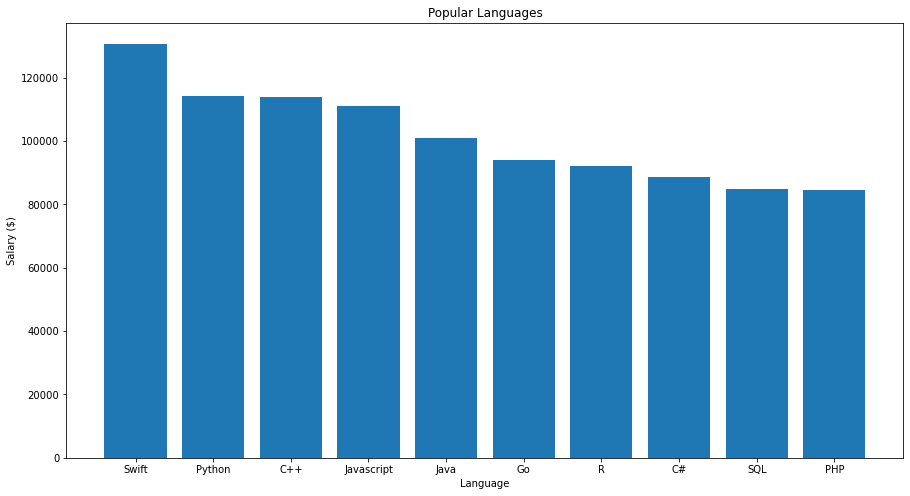

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.bar(x, y)
plt.xlabel("Language")
plt.ylabel("Salary ($)")
plt.title("Popular Languages")
plt.show()

In [9]:
# your code goes here
import pandas as pd

df = pd.DataFrame(data=data_rows, columns=header)
df.to_csv('popular-languages.csv')

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01).
